# **Lab Exercise: Linear and Logistic Regression**

## **Linear Regression Construction** 

#### **Section 1: Setting Up and Importing Libraries**
*Objective:* Load the required `Python libraries`.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Section 2: Linear Regression Data Preparation**

*Objective:* Create a dataset for linear regression.

Task: Write the code to:

Create a dataset with features and target variables for linear regression.
Visualize the data using Matplotlib.


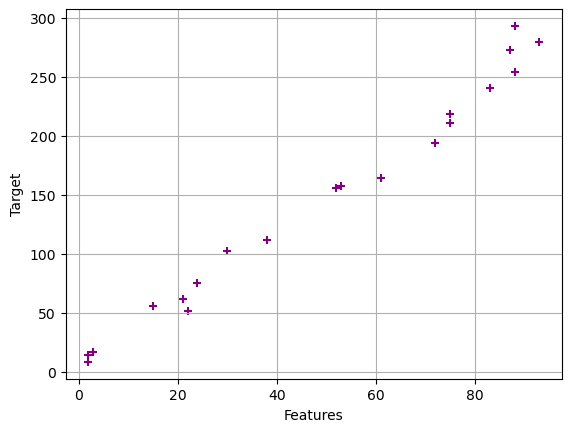

In [3]:
# Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 100, 20)  # Features (independent variable)
y = 3 * X + 7 + np.random.normal(0, 15, 20)  # Target with noise
# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid

plt.xlabel('Features') 
plt.ylabel('Target')
plt.scatter(X, y, color='purple', marker='+') # Create the scatter plot using X and y
plt.grid() # Add a grid
plt.show() # Display the scatter plot

#### **Section 3: Implementing Linear Regression**

*Objective:* Practice linear regression construction.

Task: Write the code to:

Write a Linear Regression function to minimize the cost function and find the optimal parameters.


For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it.

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


Slope/coefficient:  [2.92415997]
Intercept:  3.1375660847498636


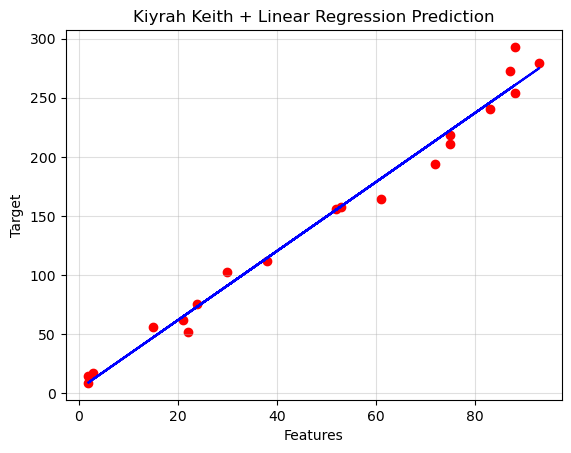

In [5]:
# Your code for linear regression model

# Sklearn model
import sklearn
from sklearn import linear_model

# Prepare data
X_train = X.reshape(-1, 1) # Reshape the X feature data to be in a suitable format
y_train = y # y is already a suitable 1D array

# Building the Model
reg = linear_model.LinearRegression() # Create a new linear regression model
reg.fit(X_train, y_train)

# Review Model parameter 
print("Slope/coefficient: ", reg.coef_)
print("Intercept: ", reg.intercept_)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, reg.predict(X_train), color='blue')
plt.title('Kiyrah Keith + Linear Regression Prediction')
plt.xlabel('Features')
plt.ylabel('Target')
plt.grid(alpha=0.4)
plt.show()

In [7]:
# Your code for linear regression model

# Manually write cost function & gradient descent 

# Reshape X to include a bias term (column of ones for the intercept) by np.column_stack
X = np.column_stack((np.ones(len(X)), X))

# Define the cost function for linear regression
def compute_cost(X, y, theta):
    cost = np.sum(np.square(np.dot(X, theta) - y)) / (2 * len(y))
    return cost
    

# Define the gradient descent function
def gradient_descent(X, y, alpha, iterations):
    """
    Perform gradient descent to minimize the cost function.
    """
    theta = np.zeros(2)  # Initialize theta (matching number of features)
    m = len(y)  # Number of training examples

    # Iterate to update theta with iterations
    for i in range(iterations):
        # Update theta[0] (intercept term) using the gradient of the cost function
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        
        # Update theta[1] (slope term) using the gradient of the cost function
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        
        # Update theta as a new array with the computed values
        theta = np.array([t0, t1])

    return theta
    


# Number of iterations for gradient descent
iterations = 5000

# Learning rate for gradient descent
alpha = 0.0001

# Call the gradient descent function to compute optimized parameters
theta = gradient_descent(X, y, alpha, iterations)

# Compute the cost using the optimized parameters
cost = compute_cost(X, y, theta)

# Print the results
print("Optimized theta (parameters):", theta)  # Optimized values for theta (intercept and slope)
print("Final cost:", cost)  # Final cost value to evaluate the fit

Optimized theta (parameters): [0.46266464 2.96267244]
Final cost: 69.69441359034002


### **Section 4: Visualizing the Linear Regression Line**

*Objective:* Plot the regression line with the original data.

Task: Plot the data points and the fitted regression line.

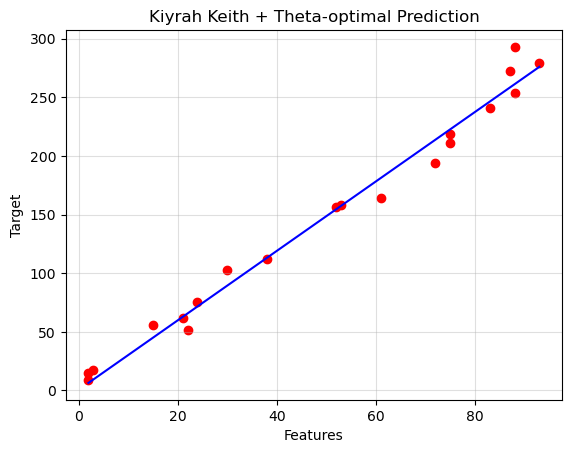

In [9]:
# Compare predictions with actual values
y_pred = np.dot(X, theta)


# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

#Your code:
plt.scatter(X_train, y, color = 'red')
samples = np.linspace(np.min(X_train), np.max(X_train))
plt.plot(samples, theta[0] + theta[1]*samples, color='blue')
plt.title('Kiyrah Keith + Theta-optimal Prediction')
plt.xlabel('Features')
plt.ylabel('Target')
plt.grid(alpha=0.4)
plt.show()

## **Logistic Regression Construction** 

#### **Section 1: Logistic Regression Data Preparation**

*Objective:* Prepare data for logistic regression.

Task: Write the code to:

Create synthetic data for binary classification.
Visualize the data.

#### Dataset Description

Study_hour_Data.csv - The dataset simulates a scenario where students' chances of passing a course are influenced by their study habits and class participation. It contains 200 observations and the following three columns:


**Hours of Study:**
Integer values representing the number of hours a student spends studying in a week.
Range: 0 to 9.

**Class Participation:**
Float values between 0 and 1, representing the level of engagement in class activities.
Higher values indicate greater participation.

**Passed:**
Binary target variable indicating whether the student passed the course:
1: Passed.
0: Did not pass.
Determined based on a weighted combination of Hours of Study and Class Participation (with added noise), with a threshold value of 5.

In [55]:
import pandas as pd
#read data from Pandas 

# Load dataset
# please use Study_hour_Data.csv as your target data
data = pd.read_csv("Study_hour_Data.csv")

# Display basic information
print(data.info())
print(data.describe())

#Generate your training data X & y
X = data[['Hours of Study']] #use column Hours of Study
y =  data[['Passed']].values.ravel() #use column Passed with reformatting the format needed for use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours of Study       200 non-null    int64  
 1   Class Participation  200 non-null    float64
 2   Passed               200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB
None
       Hours of Study  Class Participation      Passed
count      200.000000           200.000000  200.000000
mean         4.115000             0.505828    0.750000
std          2.751295             0.289315    0.434099
min          0.000000             0.009934    0.000000
25%          2.000000             0.248919    0.750000
50%          4.000000             0.492630    1.000000
75%          6.000000             0.771555    1.000000
max          9.000000             0.992191    1.000000


#### **Section 2: Visualize the data**

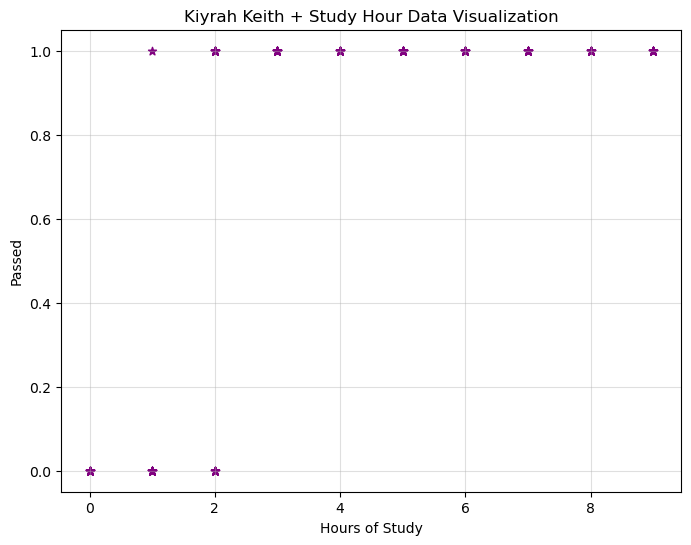

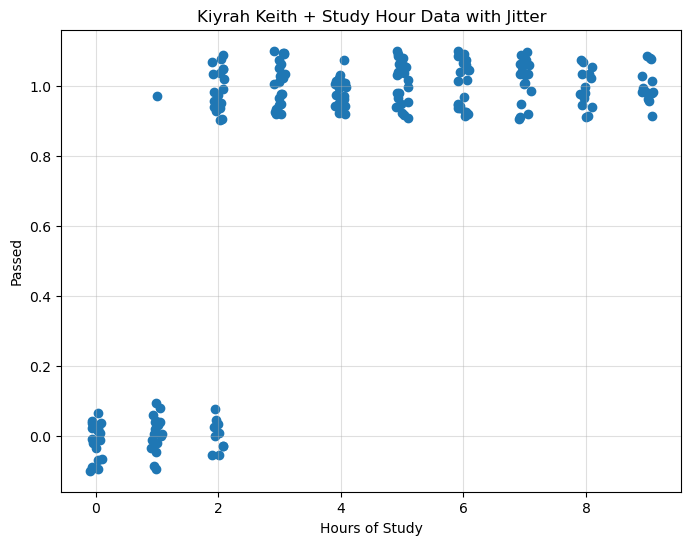

In [25]:
# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 
plt.figure(figsize=(8, 6))
plt.scatter(X, y, marker='*', color='purple')
plt.xlabel('Hours of Study')
plt.ylabel('Passed')
plt.title('Kiyrah Keith + Study Hour Data Visualization')
plt.grid(alpha=0.4)
plt.show()

# Add a second plot with jitter so that more of the overlapping points are visible. 
jitter_strength = 0.1  # Adjust the jitter strength as needed
x_jittered = X + np.random.uniform(-jitter_strength, jitter_strength, size=X.shape)
y_jittered = y + np.random.uniform(-jitter_strength, jitter_strength, size=y.shape)

# Create the scatter plot with jittered points
plt.figure(figsize=(8, 6))
plt.scatter(x_jittered, y_jittered)
plt.xlabel('Hours of Study')
plt.ylabel('Passed')
plt.title('Kiyrah Keith + Study Hour Data with Jitter')
plt.grid(alpha=0.4)
plt.show()

#### **Section 3: Implementing Logistic Regression**

*Objective:* Implement logistic regression.

For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it. 

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


Then, use the scipy.optimize library to fit the logistic regression model.

In [63]:
# Your code for logistic regression model

# Sklearn model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # Split the data into training (80%) and testing (20%)

# Building the Model
model = LogisticRegression() # Build the logistic regression model
model.fit(X_train, y_train) # Train the model

# Review Model parameter 
y_predicted = model.predict(X_test)
print("Predicted values: ", y_predicted) # Display the model predictions for the test data
print("Actual values: ", y_test) # Display the actual values for the test data target

print("Prediction probability: ", model.predict_proba(X_test))
print("Score: ", model.score(X_test, y_test))
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Predicted values:  [1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 0 1 1]
Actual values:  [1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 0 0 1]
Prediction probability:  [[5.33819629e-02 9.46618037e-01]
 [3.56267409e-05 9.99964373e-01]
 [8.84513182e-01 1.15486818e-01]
 [3.56267409e-05 9.99964373e-01]
 [5.33819629e-02 9.46618037e-01]
 [4.81556527e-03 9.95184435e-01]
 [4.15037509e-04 9.99584962e-01]
 [3.56267409e-05 9.99964373e-01]
 [4.81556527e-03 9.95184435e-01]
 [3.05713189e-06 9.99996943e-01]
 [5.33819629e-02 9.46618037e-01]
 [3.05713189e-06 9.99996943e-01]
 [9.88920670e-01 1.10793299e-02]
 [3.56267409e-05 9.99964373e-01]
 [3.96571581e-01 6.03428419e-01]
 [4.81556527e-03 9.95184435e-01]
 [5.33819629e-02 9.46618037e-01]
 [3.96571581e-01 6.03428419e-01]
 [3.56267409e-05 9.99964373e-01]
 [9.88920670e-01 1.10793299e-02]
 [3.96571581e-01 6.03428419e-01]
 [3.56267409e-05 9.99964373e-01]
 [2.62324784e-07 9.99999738e-01]
 [3.56267409e-0

In [71]:
# Your logistic regression model
import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
     

# Define the cost function for logistic regression
def cost_function(theta, X, y):
    m = len(y) # The number of training examples
    h = sigmoid(X.dot(theta)) # Compute the predicted probabilities using sigmoid
    cost = -(1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) # Compute the cost

    return cost
   

# Define the gradient function
def gradient(theta, X, y):
    m = len(y) # The number of training examples
    h = sigmoid(X.dot(theta)) # Compute the predicted probabilities using sigmoid
    gradient = (1 / m) * X.T.dot(h - y) # Compute the gradient vector

    return gradient
    

In [73]:
# Train your model
from scipy.optimize import minimize

def train(X, y):
    # Add a bias term (intercept) to X 
    X = np.column_stack((np.ones(len(X)), X))
    
    # Initialize theta (parameters) to zeros
    theta = np.zeros (X.shape[1])

    # Minimize the cost function using scipy.optimize
    result = minimize(fun=cost_function, x0=theta, args=(X, y), method='TNC', jac=gradient, options={'maxfun': 4000})

    return result

theta = train(X_train, y_train)

# Get the model coefficients
theta_optimized = theta.x
intercept = theta_optimized[0] # Extract the intercept
print("Intercept: ", intercept)

coef = theta_optimized[1:] # Extract the coefficients
print("Coefficients: ", coef)

# Print the optimized parameters (theta)
print("Optimized theta (parameters):", theta_optimized)

Intercept:  -6.845807321407328
Coefficients:  [3.69421688]
Optimized theta (parameters): [-6.84580732  3.69421688]


#### **Section 4: Evaluate the model**

*Objective:* Evaluate the model with the fitted data.

Task: build the Predict function, and Calculate accuracy.

In [77]:
# Predict function
def predict(X, theta):
    probabilities = sigmoid(X.dot(theta))
    return (probabilities >= 0.5).astype(int)

# Make predictions
X_test_C = np.column_stack((np.ones(len(X_test)), X_test)) # Reformat X_test to add a ones column
predictions = predict(X_test_C, theta_optimized)

In [79]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 97.5 %


### **Section 5: Visualizing Logistic Regression Fit**

*Objective:* Plot the logistic regression fit with the original data.

Task: Plot the sigmoid curve over the range of input features.

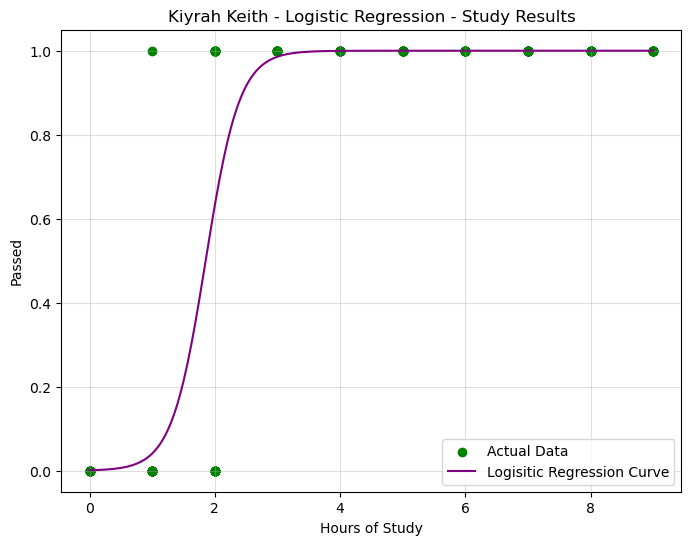

In [81]:
# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='green', label='Actual Data')
study_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1) # Create a smooth line of data for the selected range

X_range = np.column_stack((np.ones(len(study_range)), study_range))
probabilities = sigmoid(X_range.dot(theta_optimized)) # Calculate sigmoid probabilities

# Plot the original data and the Logistic Regression curve
plt.plot(study_range, probabilities, color='purple', label='Logisitic Regression Curve') 

# Add labels and formatting
plt.xlabel('Hours of Study')
plt.ylabel('Passed')
plt.title('Kiyrah Keith - Logistic Regression - Study Results')
plt.legend()
plt.grid(alpha=0.4)
plt.show()
